In [1]:
import numpy as np
import time
import pickle
import random
import utils as Utils
import pandas as pd
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
# import modules.model as Model
from matplotlib.backends.backend_pdf import PdfPages
import sklearn.metrics as metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE 
# import modules.processor as Processor
# import modules.utils as Utils
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
# import xgboost as xgb
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from tqdm import tqdm

In [2]:
import glob
import os

path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "./process_data/data/final/*.csv"))
csv_files

['/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/trb_10x_pos.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_tra_neg.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/trb_10x_neg.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_tra_pos.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tbadb_tra.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/mcpas_tra.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_trb_pos.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tra_10x_pos.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tra_10x_neg.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/vdjdb_tra.csv',
 '/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/vdjdb_trb.csv',
 '/tf/Diem/SM07/T

In [3]:
trb_10x_pos = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/trb_10x_pos.csv',)
dataset_tra_neg = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_tra_neg.csv',)
trb_10x_neg = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/trb_10x_neg.csv',)
dataset_tra_pos = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_tra_pos.csv',)
tbadb_tra = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tbadb_tra.csv',)
mcpas_tra = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/mcpas_tra.csv',)
dataset_trb_pos = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_trb_pos.csv',)
tra_10x_pos = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tra_10x_pos.csv',)
tra_10x_neg = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tra_10x_neg.csv',)
vdjdb_tra = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/vdjdb_tra.csv',)
vdjdb_trb = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/vdjdb_trb.csv',)
tbadb_trb = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/tbadb_trb.csv',)
dataset_trb_neg = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_trb_neg.csv',)
IEDB_loaded_new = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/IEDB-loaded-new.csv', on_bad_lines='skip')
mcpas_trb = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/mcpas_trb.csv')

<ipython-input-3-16d13bdeaae5>:7: DtypeWarning: Columns (5,6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_trb_pos = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/dataset_trb_pos.csv',)
<ipython-input-3-16d13bdeaae5>:14: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  IEDB_loaded_new = pd.read_csv('/tf/Diem/SM07/TCR-ML/Improve_model/modelv2/./process_data/data/final/IEDB-loaded-new.csv', on_bad_lines='skip')


In [4]:
# IEDB_loaded_new.Pathogen_source.value_counts()

In [5]:
def check_length(df):
    df["len_epitope"] = df.epitope.str.len()
    df = df[(df["len_epitope"] <= 11) & (df["len_epitope"] >= 8)]
#     df["len_cdr3"] = df.CDR3b.str.len()
#     df = df[(df["len_cdr3"] <= 19) & (df["len_cdr3"] >= 8)]
    df = df.drop(['len_epitope'], axis=1)
    discard = ["\*", '_', '-', 'O', '1', 'y', 'l', 'X', '/', ' ']
    df = df[~df.epitope.str.contains('|'.join(discard))]
    df = df.reset_index(drop=True)
    return df

def check_length_TCR(df):
    df["len_cdr3"] = df.CDR3b.str.len()
    df = df[(df["len_cdr3"] <= 19) & (df["len_cdr3"] >= 8)]
    df = df.drop(['len_cdr3'], axis=1)
    discard = ["\*", '_', '-', 'O', '1', 'y', 'l', 'X', '/', ' ']
    df = df[~df.CDR3b.str.contains('|'.join(discard))]
    df = df.reset_index(drop=True)
    return df

def check_length_full(df):
    df["len_epitope"] = df.epitope.str.len()
    df = df[(df["len_epitope"] <= 11) & (df["len_epitope"] >= 8)]
    df["len_cdr3"] = df.CDR3b.str.len()
    df = df[(df["len_cdr3"] <= 19) & (df["len_cdr3"] >= 8)]
    df = df.drop(['len_epitope', 'len_cdr3'], axis=1)
    df = df.reset_index(drop=True)
    
    discard = ["\*", '_', '-', 'O', '1', 'y', 'l', 'X', '/', ' ']
    df = df[~df.CDR3b.str.contains('|'.join(discard))]
    df = df[~df.epitope.str.contains('|'.join(discard))]
    return df

In [6]:
nepdb = pd.read_csv("./process_data/data/final/NECID_query.csv")
dbpepNeo_hc = pd.read_csv("./process_data/data/final/MHC-I HC neoantigens.csv", encoding= 'unicode_escape')
dbpepNeo_mc = pd.read_csv("./process_data/data/final/MHC-I MC neoantigens.csv", index_col=[0])
tsnadb_iedb = pd.read_csv("./process_data/data/final/iedb_validated.txt", delimiter = "\t")

In [7]:
mcpas_trb = mcpas_trb[mcpas_trb.Species == "Human"]

IEDB_loaded_new = IEDB_loaded_new.rename(columns={"Chain 2 CDR3 Curated": "CDR3b", "Description": "epitope", "Antigen": "HLA"})
IEDB_loaded_new["binder"] = 1

In [8]:
trb_10x_pos_exc_autoimmune = trb_10x_pos[trb_10x_pos.Pathogen_source != 'autoimmune']
trb_10x_neg_exc_autoimmune = trb_10x_neg[trb_10x_neg.Pathogen_source != 'autoimmune']
tbadb_trb_exc_autoimmune = tbadb_trb[tbadb_trb.Pathogen_source != 'autoimmune']
vdjdb_trb_exc_autoimmune = vdjdb_trb[vdjdb_trb.Pathogen_source != 'autoimmune']
vdjdb_trb_exc_autoimmune = vdjdb_trb_exc_autoimmune[vdjdb_trb_exc_autoimmune.Pathogen_source != 'plant/ autoimmune']
iedb_trb_exc_autoimmune = IEDB_loaded_new[IEDB_loaded_new.Pathogen_source != 'autoimmune']
mcpas_trb_exc_autoimmune = mcpas_trb[mcpas_trb.Pathogen_source != 'autoimmune']

trb_10x_pos_exc_autoimmune = check_length_full(trb_10x_pos_exc_autoimmune)
trb_10x_neg_exc_autoimmune = check_length_full(trb_10x_neg_exc_autoimmune)
tbadb_trb_exc_autoimmune   = check_length_full(tbadb_trb_exc_autoimmune)
vdjdb_trb_exc_autoimmune   = check_length_full(vdjdb_trb_exc_autoimmune)
iedb_trb_exc_autoimmune    = check_length_full(iedb_trb_exc_autoimmune)
mcpas_trb_exc_autoimmune   = check_length_full(mcpas_trb_exc_autoimmune)

<ipython-input-5-bb38e8ce9b4e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_epitope"] = df.epitope.str.len()
<ipython-input-5-bb38e8ce9b4e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_cdr3"] = df.CDR3b.str.len()
<ipython-input-5-bb38e8ce9b4e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [9]:
iedb_trb_exc_autoimmune

,Immunization Comments,Method/Technique,Assay Group,Assay IDs,Name,Organism,epitope,HLA,Response Type,MHC Allele Names,Chain 1 CDR3 Curated,CDR3b,Pathogen_source,Database division,binder
0,NaN,3H-thymidine,proliferation,5590806,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),IPSINVHHY,HCMVUL83,T cell,HLA-B35,ATETSNYQLI,ASSLSTSPNEKLF,virus,NaN,1
1,NaN,3H-thymidine,proliferation,5590806,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),IPSINVHHY,HCMVUL83,T cell,HLA-B35,AVEDSNYQLI,ASSDGTGPNEKLF,virus,NaN,1
2,NaN,3H-thymidine,proliferation,5590806,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),IPSINVHHY,HCMVUL83,T cell,HLA-B35,ATEGSNYQLI,ASTTSGGPNEKLF,virus,NaN,1
3,NaN,3H-thymidine,proliferation,5590807,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),IPSINVHHY,HCMVUL83,T cell,HLA-B35,AVEDSNYQLI,ASSDGTGPNEKLF,virus,NaN,1
4,NaN,3H-thymidine,proliferation,5590807,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),IPSINVHHY,HCMVUL83,T cell,HLA-B35,ATETSNYQLI,ASSLSTSPNEKLF,virus,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91863,Virus-specific T cell were generated by stimul...,multimer/tetramer,qualitative binding,6252050,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),TPRVTGGGAM,pp65,T cell,HLA-B*07:02,NaN,ASSELGGDYEQY,virus,antigen-specific validated database,1
91864,Virus-specific T cell were generated by stimul...,multimer/tetramer,qualitative binding,6252041,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),NLVPMVATV,pp65,T cell,HLA-A*02:01,NaN,ASSLRDTNNEKLF,virus,antigen-specific validated database,1
91865,Virus-specific T cell were generated by stimul...,multimer/tetramer,qualitative binding,6252041,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),NLVPMVATV,pp65,T cell,HLA-A*02:01,NaN,ASSELGGDYEQY,virus,antigen-specific validated database,1
91866,Virus-specific T cell were generated by stimul...,multimer/tetramer,qualitative binding,6252050,Homo sapiens (human),Human herpesvirus 5 (Human cytomegalovirus),TPRVTGGGAM,pp65,T cell,HLA-B*07:02,NaN,ASSLRDTNNEKLF,virus,antigen-specific validated database,1


In [10]:
mcpas_trb_data = mcpas_trb[["CDR3b", "epitope", "binder"]]
vdjdb_trb_data = vdjdb_trb[["CDR3b", "epitope", "binder"]]
tbadb_trb_data = tbadb_trb[["CDR3b", "epitope", "binder"]]
trb_10x_pos_data = trb_10x_pos[["CDR3b", "epitope", "binder"]]
trb_10x_neg_data = trb_10x_neg[["CDR3b", "epitope", "binder"]]
iedb_trb_data = IEDB_loaded_new[["CDR3b", "epitope", "binder"]]

mcpas_trb_data   =  check_length_full(mcpas_trb_data)
vdjdb_trb_data   =  check_length_full(vdjdb_trb_data)
tbadb_trb_data   =  check_length_full(tbadb_trb_data)
trb_10x_pos_data =  check_length_full(trb_10x_pos_data)
trb_10x_neg_data =  check_length_full(trb_10x_neg_data)
iedb_trb_data    =  check_length_full(iedb_trb_data)

<ipython-input-5-bb38e8ce9b4e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_epitope"] = df.epitope.str.len()
<ipython-input-5-bb38e8ce9b4e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["len_cdr3"] = df.CDR3b.str.len()
<ipython-input-5-bb38e8ce9b4e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [11]:
trb_data_pos = pd.concat([mcpas_trb_data, vdjdb_trb_data, tbadb_trb_data, trb_10x_pos_data, iedb_trb_data])
trb_data_pos = trb_data_pos.drop_duplicates()
trb_data_pos = trb_data_pos.reset_index(drop=True)
trb_data_pos

,CDR3b,epitope,binder
0,ASSLGNEQ,EAAGIGILTV,1
1,ASSLGVATGEL,EAAGIGILTV,1
2,ASSQEEGGGSWGNTIY,EAAGIGILTV,1
3,ASSQEGLAGASQY,EAAGIGILTV,1
4,ASSQGQLTDTQY,EAAGIGILTV,1
...,...,...,...
108824,ASSELGGDYEQY,TPRVTGGGAM,1
108825,ASSLRDTNNEKLF,NLVPMVATV,1
108826,ASSELGGDYEQY,NLVPMVATV,1
108827,ASSLRDTNNEKLF,TPRVTGGGAM,1


In [12]:
len(trb_data_pos.epitope.unique())

1525

In [13]:
tsnadb_iedb_wt = tsnadb_iedb[["Peptide"]]
nepdb_wt = nepdb[["minimal_peptide"]]
dbpepNeo_mc_wt = dbpepNeo_mc[["WT_peptide"]]
dbpepNeo_hc_wt = dbpepNeo_hc[["WT_peptide"]]

tsnadb_iedb_wt = tsnadb_iedb_wt.rename(columns={"Peptide": "epitope"})
nepdb_wt = nepdb_wt.rename(columns={"minimal_peptide": "epitope"})
dbpepNeo_mc_wt = dbpepNeo_mc_wt.rename(columns={"WT_peptide": "epitope"})
dbpepNeo_hc_wt = dbpepNeo_hc_wt.rename(columns={"WT_peptide": "epitope"})

tsnadb_iedb_wt = check_length(tsnadb_iedb_wt)
nepdb_wt = check_length(nepdb_wt)
dbpepNeo_mc_wt = check_length(dbpepNeo_mc_wt)
dbpepNeo_hc_wt = check_length(dbpepNeo_hc_wt)

In [14]:
data_wt = pd.concat([tsnadb_iedb_wt, nepdb_wt, dbpepNeo_mc_wt, dbpepNeo_hc_wt])
data_wt = data_wt.drop_duplicates().reset_index(drop=True)
data_wt = check_length(data_wt)
data_wt

,epitope
0,SIYVYKVLK
1,GLLDAVTYL
2,SSDVIRLIMQY
3,GFTAIVLTY
4,AMLDTVVFK
...,...
2504,SSMIMEIEL
2505,CYMEALALV
2506,STPSASPLPV
2507,SASPLPVV


In [15]:
tbadb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates()

,CDR3b
0,ASSQGTISYEQY
1,ASSVGGVTYNEQF
2,ASTDGGDSYTQY
3,ATGAASSYEQY
4,ASSQEGTPISYEQY
...,...
5830,ASGLVPGGVVYEQY
5831,ASSDRATQPQH
5832,ASSIMGSGNTIY
5833,ASSPLIGEQY


In [16]:
df = data_wt.copy()
df1 = tbadb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates().copy()

In [17]:
df['key'] = 1
df1['key'] = 1
  
# to obtain the cross join we will merge 
# on the key and drop it.
result = pd.merge(df, df1, on ='key').drop("key", 1)
result

,epitope,CDR3b
0,SIYVYKVLK,ASSQGTISYEQY
1,SIYVYKVLK,ASSVGGVTYNEQF
2,SIYVYKVLK,ASTDGGDSYTQY
3,SIYVYKVLK,ATGAASSYEQY
4,SIYVYKVLK,ASSQEGTPISYEQY
...,...,...
14491979,LVRRTLLHA,ASGLVPGGVVYEQY
14491980,LVRRTLLHA,ASSDRATQPQH
14491981,LVRRTLLHA,ASSIMGSGNTIY
14491982,LVRRTLLHA,ASSPLIGEQY


In [18]:
result["binder"] = 0

In [19]:
result

,epitope,CDR3b,binder
0,SIYVYKVLK,ASSQGTISYEQY,0
1,SIYVYKVLK,ASSVGGVTYNEQF,0
2,SIYVYKVLK,ASTDGGDSYTQY,0
3,SIYVYKVLK,ATGAASSYEQY,0
4,SIYVYKVLK,ASSQEGTPISYEQY,0
...,...,...,...
14491979,LVRRTLLHA,ASGLVPGGVVYEQY,0
14491980,LVRRTLLHA,ASSDRATQPQH,0
14491981,LVRRTLLHA,ASSIMGSGNTIY,0
14491982,LVRRTLLHA,ASSPLIGEQY,0


In [20]:
result_sub = result.sample(n = 600000, random_state = 123).reset_index(drop=True)
result_sub

,epitope,CDR3b,binder
0,PFDTRQMLFY,ASSYDGRGPYQETQY,0
1,LVTCLGLSY,ASSKRSTDTQY,0
2,ATADVEWRW,ASSLARVTGELF,0
3,QLREDASTV,ASSLYEEVLLSYNEQF,0
4,RIMKKTSLY,ASSQERGGKWAYEQY,0
...,...,...,...
599995,KLHDVELHQV,ASSGGTGELF,0
599996,LLLQHSPAL,ASSLQGFAEQY,0
599997,MPYGYVLNES,SAKGRAKNIQY,0
599998,YPLDFARTRLA,APMWAPLH,0


In [21]:
result_sub.epitope.value_counts()

KLDEQGLNY      291
KSFEDRVGTIK    287
YFLPITPHY      286
SPWADNTAL      286
GLIDFAIQL      284
              ... 
FLNVTSVHL      195
TLQEFLERI      194
MYMTVSIIDRF    194
AYHPIEWAI      192
IIGAGPAGL      191
Name: epitope, Length: 2509, dtype: int64

In [22]:
# tbadb_trb_exc_autoimmune_cdr3 = tbadb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates()
# tbadb_trb_exc_autoimmune_cdr3 = check_length_TCR(tbadb_trb_exc_autoimmune_cdr3)
# tbadb_trb_exc_autoimmune_cdr3 = tbadb_trb_exc_autoimmune_cdr3.sample(n=len(data_wt), random_state=123).reset_index(drop=True)
# tbadb_trb_exc_wt = pd.concat([tbadb_trb_exc_autoimmune_cdr3, data_wt], axis= 1)
# tbadb_trb_exc_wt["binder"] = 0

# vdjdb_trb_exc_autoimmune_cdr3 = vdjdb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates()

# vdjdb_trb_exc_autoimmune_cdr3 = vdjdb_trb_exc_autoimmune_cdr3.merge(tbadb_trb_exc_autoimmune_cdr3, indicator='i', how='outer').query('i == "left_only"').drop('i', axis=1)
# vdjdb_trb_exc_autoimmune_cdr3 = vdjdb_trb_exc_autoimmune_cdr3.sample(n=len(data_wt), random_state=123).reset_index(drop=True)
# vdjdb_trb_exc_wt = pd.concat([vdjdb_trb_exc_autoimmune_cdr3, data_wt], axis= 1)
# vdjdb_trb_exc_wt["binder"] = 0

# mcpas_trb_exc_autoimmune_cdr3 = tbadb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates()
# mcpas_trb_exc_autoimmune_cdr3 = check_length_TCR(tbadb_trb_exc_autoimmune_cdr3)
# mcpas_trb_exc_autoimmune_cdr3 = mcpas_trb_exc_autoimmune_cdr3.merge(vdjdb_trb_exc_autoimmune_cdr3, indicator='i', how='outer').query('i == "left_only"').drop('i', axis=1)
# mcpas_trb_exc_autoimmune_cdr3 = mcpas_trb_exc_autoimmune_cdr3.sample(n=len(data_wt), random_state=123).reset_index(drop=True)
# mcpas_trb_exc_wt = pd.concat([mcpas_trb_exc_autoimmune_cdr3, data_wt], axis= 1)
# mcpas_trb_exc_wt["binder"] = 0

# iedb_trb_exc_autoimmune_cdr3 = tbadb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates()
# mcpas_trb_exc_autoimmune_cdr3 = check_length_TCR(tbadb_trb_exc_autoimmune_cdr3)
# iedb_trb_exc_autoimmune_cdr3 = iedb_trb_exc_autoimmune_cdr3.merge(mcpas_trb_exc_autoimmune_cdr3, indicator='i', how='outer').query('i == "left_only"').drop('i', axis=1)
# iedb_trb_exc_autoimmune_cdr3 = iedb_trb_exc_autoimmune_cdr3.sample(n=len(data_wt), random_state=123).reset_index(drop=True)
# iedb_trb_exc_wt = pd.concat([iedb_trb_exc_autoimmune_cdr3, data_wt], axis= 1)
# iedb_trb_exc_wt["binder"] = 0

In [23]:
# tbadb_trb_exc_autoimmune_cdr3 = tbadb_trb_exc_autoimmune[["CDR3b"]].drop_duplicates().reset_index(drop=True)
# tbadb_trb_exc_autoimmune_cdr3 = tbadb_trb_exc_autoimmune_cdr3.sample(len(data_wt), random_state = 123).reset_index(drop=True)
# tbadb_trb_exc_wt = pd.concat([tbadb_trb_exc_autoimmune_cdr3, data_wt], axis= 1)
# tbadb_trb_exc_wt["binder"] = 0

In [24]:
result.to_csv("./process_data/data/process/result.csv", index=False)

In [25]:
# data_trb_wt = pd.concat([tbadb_trb_exc_wt, vdjdb_trb_exc_wt, mcpas_trb_exc_wt, iedb_trb_exc_wt])
# data_trb_wt = check_length_TCR(data_trb_wt).reset_index(drop=True)
# data_trb_wt = check_length(data_trb_wt).reset_index(drop=True)

In [27]:
# len(data_trb_wt.epitope.unique())

In [28]:
trb_10x_neg = check_length_full(trb_10x_neg)

In [29]:
trb_10x_neg = check_length_full(trb_10x_neg)
trb_10x_neg = trb_10x_neg[["CDR3b", "epitope", "binder"]]
trb_10x_neg_sub = trb_10x_neg.sample(n=600000, random_state = 123)
trb_data_neg = pd.concat([result_sub, trb_10x_neg_sub]).reset_index(drop=True)
trb_data_neg

,epitope,CDR3b,binder
0,PFDTRQMLFY,ASSYDGRGPYQETQY,0
1,LVTCLGLSY,ASSKRSTDTQY,0
2,ATADVEWRW,ASSLARVTGELF,0
3,QLREDASTV,ASSLYEEVLLSYNEQF,0
4,RIMKKTSLY,ASSQERGGKWAYEQY,0
...,...,...,...
1199995,LLDFVRFMGV,ASSPQEGETQY,0
1199996,SLYNTVATLY,ASSLIMAGYYEQY,0
1199997,CLLWSFQTSA,ASSEKERATDTQY,0
1199998,KTWGQYWQV,ASSSGDRGTGELF,0


In [30]:
inner_data = pd.merge(trb_data_neg, trb_data_pos, how='inner', on=['CDR3b', 'epitope'])
trb_data_neg = trb_data_neg.merge(inner_data, indicator='i', how='outer', on=["CDR3b", "epitope"]).query('i == "left_only"').drop('i', axis=1)
trb_data_neg = trb_data_neg[["CDR3b", "epitope", "binder"]]

trb_data_pos = trb_data_pos.merge(inner_data, indicator='i', how='outer', on=["CDR3b", "epitope"]).query('i == "left_only"').drop('i', axis=1)
trb_data_pos = trb_data_pos[["CDR3b", "epitope", "binder"]]

In [31]:
inner_data = pd.merge(trb_data_neg, trb_data_pos, how='inner', on=['CDR3b', 'epitope'])
inner_data

,CDR3b,epitope,binder_x,binder_y


In [32]:
len(trb_data_neg.epitope.unique())

2556

In [33]:
data_trb_final = pd.concat([trb_data_neg, trb_data_pos]).reset_index(drop=True)
data_trb_final

,CDR3b,epitope,binder
0,ASSYDGRGPYQETQY,PFDTRQMLFY,0
1,ASSKRSTDTQY,LVTCLGLSY,0
2,ASSLARVTGELF,ATADVEWRW,0
3,ASSLYEEVLLSYNEQF,QLREDASTV,0
4,ASSQERGGKWAYEQY,RIMKKTSLY,0
...,...,...,...
1306290,ASSELGGDYEQY,TPRVTGGGAM,1
1306291,ASSLRDTNNEKLF,NLVPMVATV,1
1306292,ASSELGGDYEQY,NLVPMVATV,1
1306293,ASSLRDTNNEKLF,TPRVTGGGAM,1


In [34]:
list_epitope = set(data_trb_final.epitope.unique())
print(len(list_epitope))

sample_list = random.sample(list_epitope, 3204)
print(len(sample_list))
sample_list_sub = list_epitope - set(sample_list)
print(len(sample_list_sub))

4004
3204
800


In [35]:
train_trb = data_trb_final[data_trb_final.epitope.isin(sample_list)].reset_index(drop=True)
test_trb = data_trb_final[data_trb_final.epitope.isin(sample_list_sub)].reset_index(drop=True)

In [ ]:
train_trb.epitope.value_counts()

In [ ]:
test_trb.epitope.value_counts()

In [ ]:
len(train_trb.epitope.unique())

### Case1

In [36]:
##Case 01
train_trb_case1_epi = set(train_trb.epitope.unique())
print(len(train_trb_case1_epi))

train_trb_case1_sample_list = random.sample(train_trb_case1_epi, 801)
print(len(train_trb_case1_sample_list))
train_trb_case1_sample_list_sub = train_trb_case1_epi - set(train_trb_case1_sample_list)
print(len(train_trb_case1_sample_list_sub))

train_trb_case1_rf_20 = train_trb[train_trb.epitope.isin(train_trb_case1_sample_list)].reset_index(drop=True)
test_trb_case1_cb_60 = train_trb[train_trb.epitope.isin(train_trb_case1_sample_list_sub)].reset_index(drop=True)

##Case 02
train_trb_case2_epi = set(train_trb.epitope.unique())
print(len(train_trb_case2_epi))

train_trb_case2_sample_list = random.sample(train_trb_case2_epi,1602)
print(len(train_trb_case2_sample_list))
train_trb_case2_sample_list_sub = train_trb_case2_epi - set(train_trb_case2_sample_list)
print(len(train_trb_case2_sample_list_sub))

train_trb_case2_rf_20 = train_trb[train_trb.epitope.isin(train_trb_case2_sample_list)].reset_index(drop=True)
test_trb_case2_cb_60 = train_trb[train_trb.epitope.isin(train_trb_case2_sample_list_sub)].reset_index(drop=True)

##Case3
train_trb_case3_epi = set(train_trb.epitope.unique())
print(len(train_trb_case3_epi))

train_trb_case3_sample_list = random.sample(train_trb_case3_epi, 2403)
print(len(train_trb_case3_sample_list))
train_trb_case3_sample_list_sub = train_trb_case3_epi - set(train_trb_case3_sample_list)
print(len(train_trb_case3_sample_list_sub))

train_trb_case3_rf_20 = train_trb[train_trb.epitope.isin(train_trb_case3_sample_list)].reset_index(drop=True)
test_trb_case3_cb_60 = train_trb[train_trb.epitope.isin(train_trb_case3_sample_list_sub)].reset_index(drop=True)

3204
801
2403
3204
1602
1602
3204
2403
801


In [ ]:
train_trb.to_csv("./data_final/train_trb.csv", index=False)
test_trb.to_csv("./data_final/test_trb.csv", index=False)

In [ ]:
train_trb_case1_rf_20.to_csv("./data_final/train_trb_case1_rf_20.csv", index=False)
test_trb_case1_cb_60 .to_csv("./data_final/test_trb_case1_cb_60.csv", index=False)
train_trb_case2_rf_20.to_csv("./data_final/train_trb_case2_rf_20.csv", index=False)
test_trb_case2_cb_60 .to_csv("./data_final/test_trb_case2_cb_60.csv", index=False)
train_trb_case3_rf_20.to_csv("./data_final/train_trb_case3_rf_20.csv", index=False)
test_trb_case3_cb_60 .to_csv("./data_final/test_trb_case3_cb_60.csv", index=False)

In [53]:
train_trb = pd.read_csv("./data_final/train_trb.csv")
test_trb = pd.read_csv("./data_final/test_trb.csv")

In [128]:
abc = test_trb[test_trb.binder == 1]
abc = len(abc.epitope.unique())
abc

303

In [40]:
train_trb_case1_rf_20 = pd.read_csv("./data_final/train_trb_case1_rf_20.csv",)
test_trb_case1_cb_60  = pd.read_csv("./data_final/test_trb_case1_cb_60.csv", )
train_trb_case2_rf_20 = pd.read_csv("./data_final/train_trb_case2_rf_20.csv",)
test_trb_case2_cb_60  = pd.read_csv("./data_final/test_trb_case2_cb_60.csv", )
train_trb_case3_rf_20 = pd.read_csv("./data_final/train_trb_case3_rf_20.csv",)
test_trb_case3_cb_60  = pd.read_csv("./data_final/test_trb_case3_cb_60.csv", )

In [69]:
test_paper = pd.read_csv("../../Improve_model/combine_model/data_test/data_paper.csv")
train_trb_case1_rf_20_epi = train_trb_case1_rf_20.epitope.unique()
test_trb_case1_cb_60_epi = test_trb_case1_cb_60.epitope.unique()

test_paper_case1_exc_epi = test_paper[~test_paper.epitope.isin(train_trb_case1_rf_20_epi)].reset_index(drop=True)
test_paper_case1_exc_epi = test_paper_case1_exc_epi[~test_paper_case1_exc_epi.epitope.isin(test_trb_case1_cb_60_epi)].reset_index(drop=True)
test_paper_case1_exc_epi.to_csv("./data_final/test_paper_case1_exc_epi.csv", index=False)

In [70]:
test_paper = pd.read_csv("../../Improve_model/combine_model/data_test/data_paper.csv")
train_trb_case2_rf_20_epi = train_trb_case2_rf_20.epitope.unique()
test_trb_case2_cb_60_epi = test_trb_case2_cb_60.epitope.unique()

test_paper_case2_exc_epi = test_paper[~test_paper.epitope.isin(train_trb_case2_rf_20_epi)].reset_index(drop=True)
test_paper_case2_exc_epi = test_paper_case2_exc_epi[~test_paper_case2_exc_epi.epitope.isin(test_trb_case2_cb_60_epi)].reset_index(drop=True)
test_paper_case2_exc_epi.to_csv("./data_final/test_paper_case2_exc_epi.csv", index=False)

In [78]:
test_paper = pd.read_csv("../../Improve_model/combine_model/data_test/data_paper.csv")
train_trb_case3_rf_20_epi = train_trb_case3_rf_20.epitope.unique()
test_trb_case3_cb_60_epi = test_trb_case3_cb_60.epitope.unique()

test_paper_case3_exc_epi = test_paper[~test_paper.epitope.isin(train_trb_case3_rf_20_epi)].reset_index(drop=True)
test_paper_case3_exc_epi = test_paper_case3_exc_epi[~test_paper_case3_exc_epi.epitope.isin(test_trb_case3_cb_60_epi)].reset_index(drop=True)
test_paper_case3_exc_epi.to_csv("./data_final/test_paper_case3_exc_epi.csv", index=False)

In [72]:
test_paper = pd.read_csv("../../Improve_model/combine_model/data_test/data_paper.csv")
train_trb_rf_epi = train_trb.epitope.unique()

test_paper_exc_epi = test_paper[~test_paper.epitope.isin(train_trb_rf_epi)].reset_index(drop=True)
test_paper_exc_epi.to_csv("./data_final/test_paper_exc_epi.csv", index=False)

In [73]:
test_paper_exc_epi

,CDR3b,epitope,binder
0,ASRPGQVVYGYT,LLAIKVPNV,0
1,ASRPGQVVYGYT,LIIPFIHLI,0
2,ASRPGQVVYGYT,VLFHRAFLV,0
3,ASRPGQVVYGYT,FLIYLDVSV,0
4,ASRPGQVVYGYT,KMVAVFYNT,0
...,...,...,...
5376,ASGGTGEYEQY,FMIGYTSAL,1
5377,ASSGSSVETQY,LIIPFIHLI,1
5378,ASSGGGGRGYNEQF,LIIPFIHLI,1
5379,ASSEGLGWEQF,FLIYLDVSV,1


In [74]:
test_paper_case3_exc_epi

,CDR3b,epitope,binder
0,ASRPGQVVYGYT,LLAIKVPNV,0
1,ASRPGQVVYGYT,LIIPFIHLI,0
2,ASRPGQVVYGYT,VLFHRAFLV,0
3,ASRPGQVVYGYT,FLIYLDVSV,0
4,ASRPGQVVYGYT,KMVAVFYNT,0
...,...,...,...
5376,ASGGTGEYEQY,FMIGYTSAL,1
5377,ASSGSSVETQY,LIIPFIHLI,1
5378,ASSGGGGRGYNEQF,LIIPFIHLI,1
5379,ASSEGLGWEQF,FLIYLDVSV,1


In [75]:
test_paper_case2_exc_epi

,CDR3b,epitope,binder
0,ASRPGQVVYGYT,LLAIKVPNV,0
1,ASRPGQVVYGYT,LIIPFIHLI,0
2,ASRPGQVVYGYT,VLFHRAFLV,0
3,ASRPGQVVYGYT,FLIYLDVSV,0
4,ASRPGQVVYGYT,KMVAVFYNT,0
...,...,...,...
5376,ASGGTGEYEQY,FMIGYTSAL,1
5377,ASSGSSVETQY,LIIPFIHLI,1
5378,ASSGGGGRGYNEQF,LIIPFIHLI,1
5379,ASSEGLGWEQF,FLIYLDVSV,1


In [76]:
test_paper_case1_exc_epi

,CDR3b,epitope,binder
0,ASRPGQVVYGYT,LLAIKVPNV,0
1,ASRPGQVVYGYT,LIIPFIHLI,0
2,ASRPGQVVYGYT,VLFHRAFLV,0
3,ASRPGQVVYGYT,FLIYLDVSV,0
4,ASRPGQVVYGYT,KMVAVFYNT,0
...,...,...,...
5376,ASGGTGEYEQY,FMIGYTSAL,1
5377,ASSGSSVETQY,LIIPFIHLI,1
5378,ASSGGGGRGYNEQF,LIIPFIHLI,1
5379,ASSEGLGWEQF,FLIYLDVSV,1


In [77]:
test_paper_case1_exc_epi.binder.value_counts()

0    5297
1      84
Name: binder, dtype: int64

## NetTCR

In [132]:
def confusionMatrix(y_true, y_pred):
    target_names = ['Non-binder', 'Binder']
    print(classification_report(y_true, y_pred, target_names=target_names))
    cm = pd.DataFrame(confusion_matrix(y_true, y_pred), index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()

In [130]:
def _rocAuc(y_true, y_score):
    y_pred01_proba = y_score.to_numpy()
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred01_proba)
    auc = metrics.roc_auc_score(y_true, y_pred01_proba)
    plt.plot(fpr,tpr,label="AUC = "+str(auc))
    print ("AUC : ", auc)
    plt.legend(loc=4)
    plt.show()

              precision    recall  f1-score   support

  Non-binder       0.94      0.71      0.81    263660
      Binder       0.05      0.26      0.09     16337

    accuracy                           0.69    279997
   macro avg       0.50      0.49      0.45    279997
weighted avg       0.89      0.69      0.77    279997



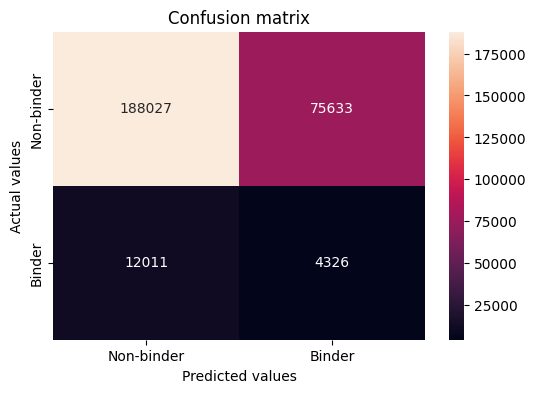

Accuracy score  :  0.6869823605252914
Sensitivity (TPR):  0.2647976984758524
Specificity (TNR):  0.7131419252067056
AUC :  0.5519150408135192
AUC :  0.5519150408135192


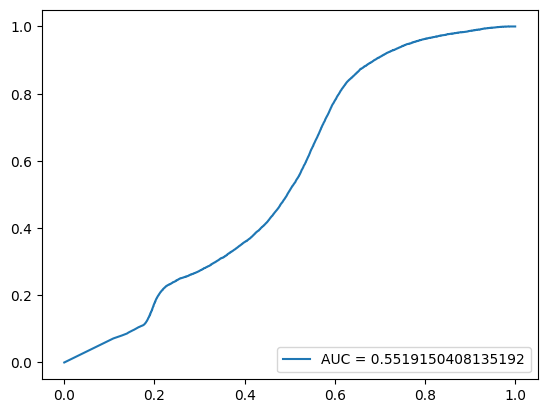

In [133]:
out_ptest_rf_cnn = pd.read_csv("./data_final/output/test_trb_cnn_output.csv")
out_ptest_rf_cnn['binder_pred'] = np.where(out_ptest_rf_cnn['prediction'] >= 0.5, 1, 0)

y_test = out_ptest_rf_cnn["binder"].to_numpy()
y_test_pred = out_ptest_rf_cnn["binder_pred"].to_numpy()

confusionMatrix(y_test, y_test_pred)

tn, fp, fn, tp= confusion_matrix(y_test, y_test_pred).ravel()
accuracy = float(accuracy_score(y_test, y_test_pred).ravel())
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
auc = metrics.roc_auc_score(y_test, out_ptest_rf_cnn["prediction"])
print ("Accuracy score  : ", accuracy)
print('Sensitivity (TPR): ', sensitivity)
print('Specificity (TNR): ', specificity)
print ("AUC : ", auc)

_rocAuc(y_test, out_ptest_rf_cnn["prediction"])

              precision    recall  f1-score   support

  Non-binder       0.99      0.36      0.53      5297
      Binder       0.02      0.80      0.04        84

    accuracy                           0.37      5381
   macro avg       0.51      0.58      0.29      5381
weighted avg       0.98      0.37      0.53      5381



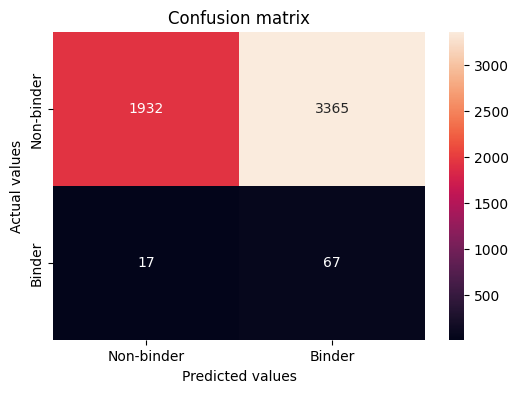

Accuracy score  :  0.3714922876788701
Sensitivity (TPR):  0.7976190476190477
Specificity (TNR):  0.3647347555219936
AUC :  0.6380296124490953
AUC :  0.6380296124490953


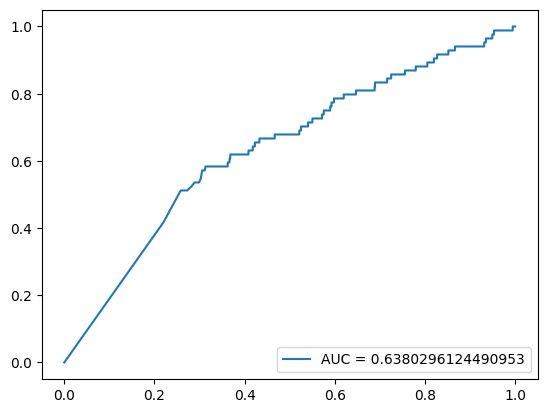

In [134]:
out_ptest_cnn_paper = pd.read_csv("./data_final/output/test_paper_exc_epi_cnn_output.csv")
out_ptest_cnn_paper['binder_pred'] = np.where(out_ptest_cnn_paper['prediction'] >= 0.5, 1, 0)

y_test = out_ptest_cnn_paper["binder"].to_numpy()
y_test_pred = out_ptest_cnn_paper["binder_pred"].to_numpy()

confusionMatrix(y_test, y_test_pred)

tn, fp, fn, tp= confusion_matrix(y_test, y_test_pred).ravel()
accuracy = float(accuracy_score(y_test, y_test_pred).ravel())
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
auc = metrics.roc_auc_score(y_test, out_ptest_cnn_paper["prediction"])
print ("Accuracy score  : ", accuracy)
print('Sensitivity (TPR): ', sensitivity)
print('Specificity (TNR): ', specificity)
print ("AUC : ", auc)

_rocAuc(y_test, out_ptest_cnn_paper["prediction"])